## Name : SAHAR MAHER

1- you should submit at least two experiments with different models (Linear Regression, Lasso , Ridge and SGR regressor).

2- you should also add the normality checks (QQ-plot / Shapiro wilk test).
3- you should also use the Sklearn pipeline  with all the preprocessing steps including the outlier removal , normalization and any other preprocessing you think it will be needed.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro, probplot

In [53]:
data=pd.read_csv('20to22NYC.csv')
data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5016\2334766414.py:1: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('20to22NYC.csv')


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14


In [54]:
# Data Cleaning
# Drop rows where SALE PRICE is zero or missing
data = data[data["SALE PRICE"] > 0].dropna(subset=["SALE PRICE"])

In [55]:
# Convert columns with mixed types to numeric
columns_to_clean = ["RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS"]
for col in columns_to_clean:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [56]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,83,A1,7 SEGUINE PLACE,NaN,10312.0,1.0,0.0,1.0,3989.0,2300.0,2004.0,1,A1,720000.0,2020-10-15


In [57]:
# Fill missing numerical values with median
numeric_cols = ["LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT"]
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [58]:
# Drop unnecessary columns
columns_to_drop = ["APARTMENT NUMBER", "ADDRESS", "SALE DATE"]
data = data.drop(columns=columns_to_drop)

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='SALE PRICE'>

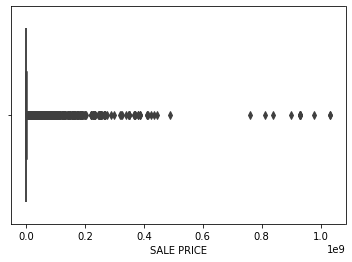

In [59]:
import seaborn as sns
sns.boxplot(data['SALE PRICE'])

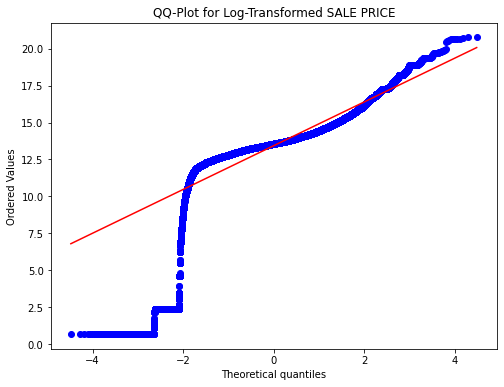

Shapiro-Wilk Test (Log-Transformed): Statistic=0.6012, p-value=0.0000
Original Data Size: 183565, Filtered Data Size: 168599


C:\Users\DELL\AppData\Local\Temp\ipykernel_5016\2954196243.py:11: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 183565.
  stat, p_value = shapiro(data["LOG_SALE_PRICE"])


In [60]:
# Log-transform the SALE PRICE to reduce skewness
data["LOG_SALE_PRICE"] = np.log1p(data["SALE PRICE"])  # log1p handles log(0) safely

# QQ-plot for transformed data
plt.figure(figsize=(8, 6))
probplot(data["LOG_SALE_PRICE"], dist="norm", plot=plt)
plt.title("QQ-Plot for Log-Transformed SALE PRICE")
plt.show()

# Shapiro-Wilk Test for transformed data
stat, p_value = shapiro(data["LOG_SALE_PRICE"])
print(f"Shapiro-Wilk Test (Log-Transformed): Statistic={stat:.4f}, p-value={p_value:.4f}")

# Optionally, outlier removal using IQR
Q1 = data["LOG_SALE_PRICE"].quantile(0.25)
Q3 = data["LOG_SALE_PRICE"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = data[(data["LOG_SALE_PRICE"] >= lower_bound) & (data["LOG_SALE_PRICE"] <= upper_bound)]
print(f"Original Data Size: {len(data)}, Filtered Data Size: {len(filtered_data)}")


In [61]:
# Define target and features
X = filtered_data.drop(columns=["SALE PRICE", "LOG_SALE_PRICE"], errors='ignore')  # Features
y = filtered_data["LOG_SALE_PRICE"]  # Target


In [62]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Define numerical and categorical columns
numeric_features = ["LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT"]
categorical_features = ["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY"]


In [64]:
# Preprocessors
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [65]:
# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [66]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}


In [67]:
results = {}
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse,"MAE": mae, "R²": r2}


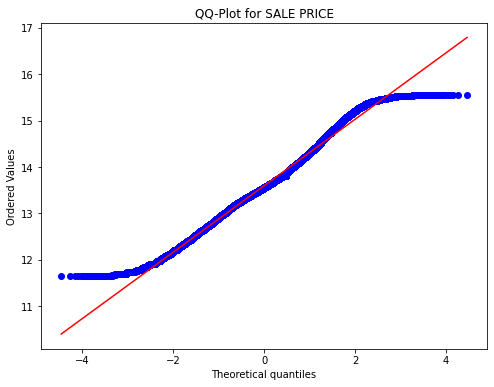

In [68]:
# Normality Check on Target Variable
plt.figure(figsize=(8, 6))
probplot(y, dist="norm", plot=plt)
plt.title("QQ-Plot for SALE PRICE")
plt.show()

In [69]:
stat, p_value = shapiro(y)
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p_value:.4f}")


Shapiro-Wilk Test: Statistic=0.9920, p-value=0.0000


C:\Users\DELL\AppData\Local\Temp\ipykernel_5016\1000709088.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 168599.
  stat, p_value = shapiro(y)


In [71]:
for model_name, metrics in results.items():
    print(f"{model_name} Results:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  R2 Score: {metrics['R²']:.4f}")
    print()

Linear Regression Results:
  MSE: 0.2433
  MAE: 0.3541
  R2 Score: 0.5306

Ridge Regression Results:
  MSE: 0.2435
  MAE: 0.3543
  R2 Score: 0.5302

Lasso Regression Results:
  MSE: 0.5184
  MAE: 0.5581
  R2 Score: -0.0000

